In this notebook, we are going to predict price of the house through different regression algorithms.

We will be preforming below steps

1. Exploratory data analysis
2. Feature Engineering
3. Prediction using different algorithms

Algorithms which we are going to cover are:

1. Linear regression
2. Ridge regression
3. Lasso regression
4. Random Forest
5. Artificial neural network 


In [1]:
#let's import all the modules as one place
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
df = pd.read_csv('../dataset/kc_house_data.csv')

## **Exploratory data analysis**

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


How is the disribution of price?

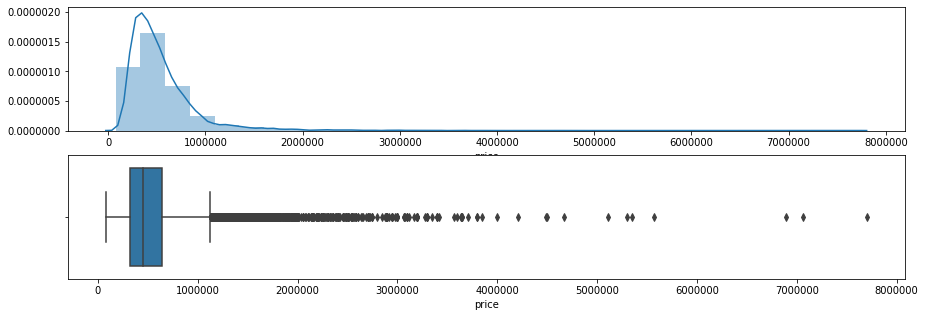

In [5]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(15,5))
sns.distplot(df['price'],bins=30,ax=ax[0])
sns.boxplot(df['price'],ax=ax[1])

- most of the prices are around 500K
- very few houses have price more than 2.5 million. These can be treated as outliers.

Let's see which features are **highly correlated** with price and plot top 4 of them

In [6]:
df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

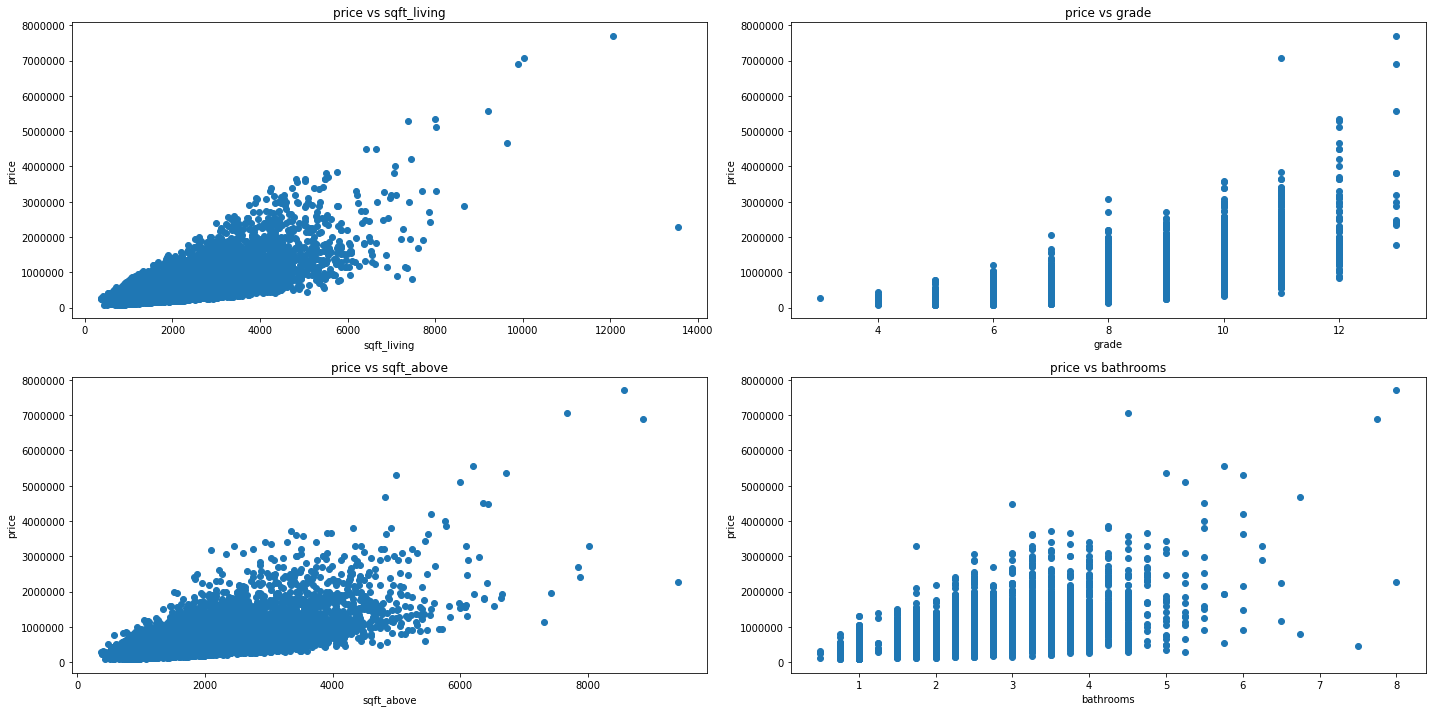

In [7]:
fig,ax_array=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
ax_array[0,0].scatter(df['sqft_living'],df['price']) #can't use seaborn joinplot in array of axes 
ax_array[0,0].set(xlabel='sqft_living',ylabel='price',title='price vs sqft_living')
ax_array[0,1].scatter(df['grade'],df['price']) 
ax_array[0,1].set(xlabel='grade',ylabel='price',title='price vs grade')
ax_array[1,0].scatter(df['sqft_above'],df['price']) 
ax_array[1,0].set(xlabel='sqft_above',ylabel='price',title='price vs sqft_above')
ax_array[1,1].scatter(df['bathrooms'],df['price']) 
ax_array[1,1].set(xlabel='bathrooms',ylabel='price',title='price vs bathrooms')
plt.tight_layout()

We can see that price increases with increase in X-axis in above graphs

In [8]:
df.isnull().any() #non of the columns have null value which is good.

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

## Feature Engineering

In [9]:
print(df.id.nunique())

21420


id column is an unique identifier for each transaction and can be dropped off as it doesn't contribute to the price

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
df.corr().price['zipcode']

-0.053402434377726675

Technically zipcode also doesn't contribute to pricing. This can be dropped too. Also there is very minor correlation between zipcode and  price

In [12]:
df.drop('zipcode',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

date is the only object/string type present in dataset and this needs to be analysed whether it is of any use or not.
Let's convert it into datetime and extract year,month information.

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['yr_of_tran'] = df['date'].apply(lambda x:x.year)
df['month_of_tran'] = df['date'].apply(lambda x:x.month)
df.corr().price['yr_of_tran']

0.003727139624315501

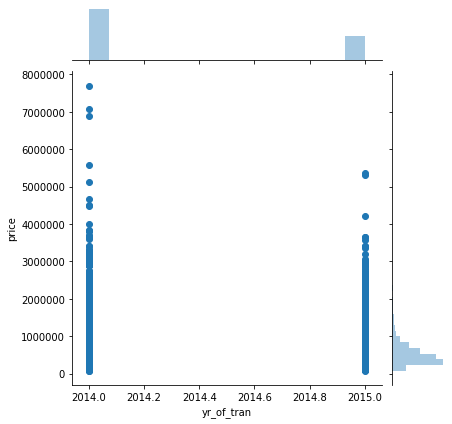

In [15]:
sns.jointplot(x='yr_of_tran',y='price',data=df)

Although as we can see that there is no major impact of year on price, but generally price increases as we tend to move to next year. This is depicted below. We can use this feature. 

In [16]:
df.groupby('yr_of_tran').mean()['price']

yr_of_tran
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

In [17]:
#we can now drop date column as we have extracted year and month features.
df.drop('date',axis=1,inplace=True)

In [18]:
#final look of data
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_of_tran,month_of_tran
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


# Implementing algorithm

We have to standardized the all features into one scale as their values ranges from single digit to 4 digits

Example bathrooms and sqft_living are of different scales. We need to being them under same scale.

You can refer to this url [chosing scaler](https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler/51237727) for choosing the scaler. Here we would be using minmax scaler

Before scaling, we need to split data into training and test sets

In [19]:
# hit and trial
# df = df[(df.price<800000)] #to remove outliers
# df = df[(df.price>2000000) & (df.price<5000000)]
# df.drop('grade',axis=1,inplace=True)
# df.drop('sqft_living15',axis=1,inplace=True)
# df.drop('bathrooms',axis=1,inplace=True)
# df.drop('sqft_lot',axis=1,inplace=True)
# df.drop('bedrooms',axis=1,inplace=True)
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_of_tran', 'month_of_tran'],
      dtype='object')


In [20]:
X=df.drop('price',axis=1).values #converting this into numpy arrays as keras/tensorflow doesn't accept dataframes
y=df['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(15117, 19) (6480, 19) (15117,) (6480,)


In [21]:
minmax = MinMaxScaler()
minmax.fit(X_train) #fit/model this using only training data and not with test data.
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)

X_test_scaled[0:2] #have a look at scaled data

array([[0.03125   , 0.06666667, 0.04935459, 0.00384789, 0.2       ,
        0.        , 0.        , 0.75      , 0.3       , 0.07190265,
        0.        , 0.05217391, 0.        , 0.8309474 , 0.09874477,
        0.18774738, 0.0049957 , 1.        , 0.09090909],
       [0.0625    , 0.13333333, 0.1070615 , 0.01329584, 0.        ,
        0.        , 0.        , 0.25      , 0.4       , 0.09623894,
        0.1120332 , 0.52173913, 0.        , 0.42319447, 0.16066946,
        0.25141972, 0.01048074, 0.        , 0.63636364]])

We are now ready for implementing different models

## Linear Model

In [22]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled,y_train)
prediction_linear = model_linear.predict(X_test_scaled)
print('RMSE for Linear model= '+ str(np.sqrt(mean_squared_error(y_test,prediction_linear))))
print('Average Price= '+ str(np.mean(y_test)))
print(model_linear.intercept_)
model_linear.coef_


RMSE for Linear model= 197577.5547058614
Average Price= 537559.1433641976
-398722.0093272475


array([-1.01385456e+06,  3.06678090e+05,  3.41406583e+17,  9.66361821e+04,
       -2.48829480e+03,  6.35356682e+05,  1.93270254e+05,  1.35147601e+05,
        1.01410100e+06, -2.34344382e+17, -1.24949106e+17, -2.78404914e+05,
        5.44884485e+04,  3.52288842e+05, -1.31037581e+05,  1.66732006e+05,
       -3.26871019e+05,  3.74503608e+04,  1.48844277e+04])

This model doesn't looks good in performing good prediction as we can see that RMSE is almost 50% of price.

In [23]:
df_prediction = pd.DataFrame(y_test,columns=['y_test'])
df_prediction['sqft_living'] = X_test[:,2] #capturing unscaled sqft_living for analysis
df_prediction['prediction_linear'] = prediction_linear
df_prediction.head()

,y_test,sqft_living,prediction_linear
0,450000.0,1020.0,443141.990673
1,279000.0,1780.0,281593.990673
2,467000.0,3460.0,636733.990673
3,828950.0,3930.0,945645.990673
4,499950.0,2798.0,598965.990673


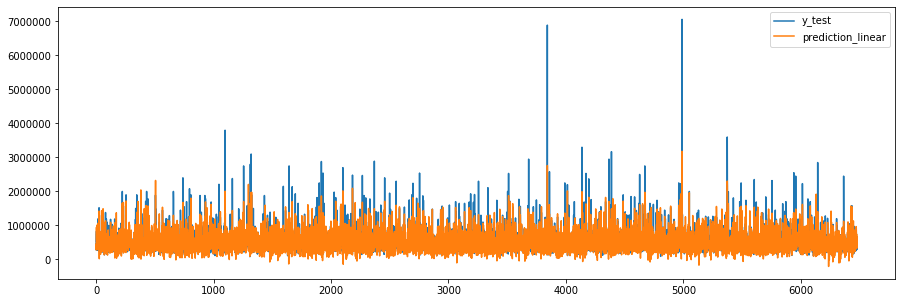

In [24]:
df_prediction[['y_test','prediction_linear']].plot(figsize=(15,5))

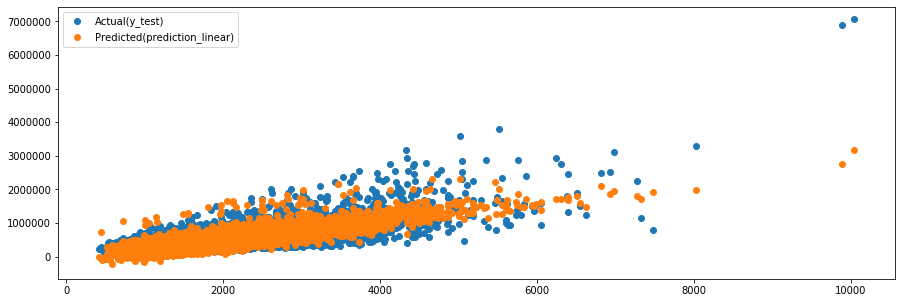

In [25]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(df_prediction['sqft_living'],df_prediction['y_test'],label='Actual(y_test)')
ax.scatter(df_prediction['sqft_living'],df_prediction['prediction_linear'],label='Predicted(prediction_linear)')
plt.legend()

In [26]:
df_prediction[['y_test','prediction_linear']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y_test,6480.0,537559.143364,358184.358280,78000.000000,320000.000000,450000.000000,645000.000000,7.060000e+06
prediction_linear,6480.0,539824.715287,306299.680049,-205582.009327,336870.990673,488377.990673,683457.990673,3.179806e+06


In [27]:
df_prediction[(df_prediction['prediction_linear']<0)].head() #negative price

,y_test,sqft_living,prediction_linear
679,229050.0,420.0,-13416.009327
1134,169950.0,840.0,-2226.009327
1479,100000.0,660.0,-74986.009327
1547,241000.0,1010.0,-32514.009327
1640,128750.0,880.0,-133116.009327


Things to watch out
- Linear model is ok with predicting houses with lower prices
- Model is completely failing in predicting price over 1.5 millions.
- There are cases where model is predicting price in negative value and this is strange

As we analyzed earlier in price distribution, there are **outliers** which is making this model to behave pretty bad specially for high prices.

Maximum value predicted by model is around 3 million and actual value is around 7.7 million

## Ridge Model

In [28]:
model_ridge = Ridge(alpha=1) #have tried for different values of alpha
model_ridge.fit(X_train_scaled,y_train)
prediction_ridge = model_ridge.predict(X_test_scaled)
print('RMSE for Ridge model= '+ str(np.sqrt(mean_squared_error(y_test,prediction_ridge))))
print('Average Price= '+ str(np.mean(y_test)))

RMSE for Ridge model= 197670.80904886266
Average Price= 537559.1433641976


In [29]:
df_prediction['prediction_ridge'] = prediction_ridge
df_prediction.head()

,y_test,sqft_living,prediction_linear,prediction_ridge
0,450000.0,1020.0,443141.990673,440314.812448
1,279000.0,1780.0,281593.990673,280634.607448
2,467000.0,3460.0,636733.990673,628768.082256
3,828950.0,3930.0,945645.990673,943887.129579
4,499950.0,2798.0,598965.990673,598582.820989


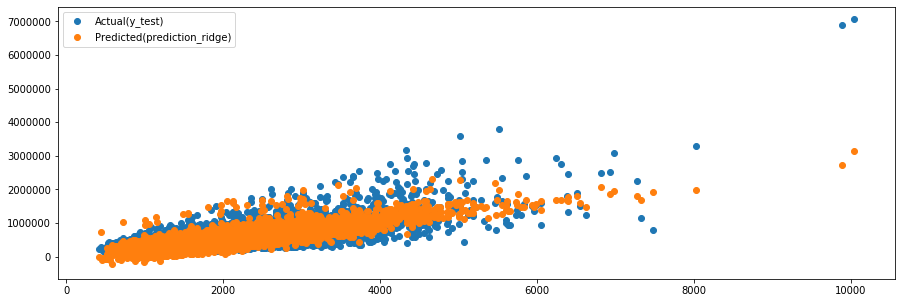

In [30]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(df_prediction['sqft_living'],df_prediction['y_test'],label='Actual(y_test)')
ax.scatter(df_prediction['sqft_living'],df_prediction['prediction_ridge'],label='Predicted(prediction_ridge)')
plt.legend()

In [31]:
print(sum((df_prediction['prediction_ridge']<0))) #prediction less than 0
df_prediction[(df_prediction['prediction_ridge']<0)].head()

29


,y_test,sqft_living,prediction_linear,prediction_ridge
679,229050.0,420.0,-13416.009327,-17666.046709
1134,169950.0,840.0,-2226.009327,-1291.176252
1479,100000.0,660.0,-74986.009327,-78004.109721
1547,241000.0,1010.0,-32514.009327,-31672.069718
1640,128750.0,880.0,-133116.009327,-132331.173106


Ridge is almost performing in similar lines as linear mode

## Lasso Model

In [32]:
model_lasso = Lasso(alpha=.01,max_iter=5000) #have tried for different value of alpha
model_lasso.fit(X_train_scaled,y_train)
prediction_lasso = model_lasso.predict(X_test_scaled)
print('RMSE for Ridge model= '+ str(np.sqrt(mean_squared_error(y_test,prediction_lasso))))
print('Average Price= '+ str(np.mean(y_test)))
df_prediction['prediction_lasso'] = prediction_lasso
df_prediction.head()

RMSE for Ridge model= 197575.2170456823
Average Price= 537559.1433641976


C:\Users\rahul kushwaha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147961121056459.28, tolerance: 208328275002.44162
  positive)


,y_test,sqft_living,prediction_linear,prediction_ridge,prediction_lasso
0,450000.0,1020.0,443141.990673,440314.812448,442878.651191
1,279000.0,1780.0,281593.990673,280634.607448,281363.166503
2,467000.0,3460.0,636733.990673,628768.082256,636440.449113
3,828950.0,3930.0,945645.990673,943887.129579,945385.919669
4,499950.0,2798.0,598965.990673,598582.820989,598731.257145


Same behaviour as Linear and Ridge

## ANN

In [33]:
model_ann = Sequential()
model_ann.add(Dense(19,activation='relu'))
model_ann.add(Dropout(0.2))

model_ann.add(Dense(40,activation='relu'))
model_ann.add(Dropout(0.3))

model_ann.add(Dense(20,activation='relu'))
model_ann.add(Dropout(0.3))

model_ann.add(Dense(1))

model_ann.compile(loss='mse',optimizer='adam')

In [34]:
model_ann.fit(x=X_train_scaled,y=y_train,
             validation_data=(X_test_scaled,y_test),
              epochs=200,
              batch_size=200
             )

Train on 15117 samples, validate on 6480 samples
Epoch 1/200
15117/15117 [==============================] - 1s 73us/sample - loss: 430996777730.4555 - val_loss: 417231558175.6049
Epoch 2/200
15117/15117 [==============================] - 0s 19us/sample - loss: 430909828320.4171 - val_loss: 416987902407.1111
Epoch 3/200
15117/15117 [==============================] - 0s 19us/sample - loss: 430132682368.8721 - val_loss: 415362338967.7037
Epoch 4/200
15117/15117 [==============================] - 0s 19us/sample - loss: 426827965296.5980 - val_loss: 409860983567.8025
Epoch 5/200
15117/15117 [==============================] - 0s 19us/sample - loss: 417915862316.0130 - val_loss: 396759484390.7161
Epoch 6/200
15117/15117 [==============================] - 0s 19us/sample - loss: 399320552822.9315 - val_loss: 372198972630.9136
Epoch 7/200
15117/15117 [==============================] - 0s 19us/sample - loss: 367280785540.6316 - val_loss: 333152569318.7161
Epoch 8/200
15117/15117 [================

Epoch 64/200
15117/15117 [==============================] - 0s 24us/sample - loss: 78617541243.7918 - val_loss: 53015430851.9506
Epoch 65/200
15117/15117 [==============================] - 0s 23us/sample - loss: 74970698062.0853 - val_loss: 52388467446.5185
Epoch 66/200
15117/15117 [==============================] - 0s 25us/sample - loss: 74946953995.2615 - val_loss: 52009997969.3827
Epoch 67/200
15117/15117 [==============================] - 0s 28us/sample - loss: 75038208707.5944 - val_loss: 51922413011.7531
Epoch 68/200
15117/15117 [==============================] - 0s 22us/sample - loss: 76776120992.5059 - val_loss: 51242270087.9012
Epoch 69/200
15117/15117 [==============================] - 0s 20us/sample - loss: 73957672432.5895 - val_loss: 50821848076.6420
Epoch 70/200
15117/15117 [==============================] - 0s 23us/sample - loss: 73103517866.0232 - val_loss: 50393352078.2222
Epoch 71/200
15117/15117 [==============================] - 0s 20us/sample - loss: 73585766224.15

15117/15117 [==============================] - 0s 18us/sample - loss: 66627778692.0897 - val_loss: 42638170870.5185
Epoch 128/200
15117/15117 [==============================] - 0s 19us/sample - loss: 62804223153.9485 - val_loss: 42073324581.9259
Epoch 129/200
15117/15117 [==============================] - 0s 19us/sample - loss: 65815745569.5305 - val_loss: 42009497460.9383
Epoch 130/200
15117/15117 [==============================] - ETA: 0s - loss: 66427559333.647 - 0s 19us/sample - loss: 65671075898.9323 - val_loss: 41976731824.9877
Epoch 131/200
15117/15117 [==============================] - 0s 18us/sample - loss: 65179693804.3728 - val_loss: 42298984713.4815
Epoch 132/200
15117/15117 [==============================] - 0s 19us/sample - loss: 65885274658.2417 - val_loss: 42111126654.4198
Epoch 133/200
15117/15117 [==============================] - 0s 18us/sample - loss: 64670361015.1475 - val_loss: 41769934658.3704
Epoch 134/200
15117/15117 [==============================] - 0s 18us/s

Epoch 190/200
15117/15117 [==============================] - 0s 18us/sample - loss: 61200582829.8165 - val_loss: 37984443922.9630
Epoch 191/200
15117/15117 [==============================] - 0s 18us/sample - loss: 62388222258.0417 - val_loss: 38411507256.8889
Epoch 192/200
15117/15117 [==============================] - 0s 18us/sample - loss: 61507175419.8680 - val_loss: 38017957306.4691
Epoch 193/200
15117/15117 [==============================] - 0s 18us/sample - loss: 59804375745.1558 - val_loss: 37954930852.3457
Epoch 194/200
15117/15117 [==============================] - 0s 18us/sample - loss: 62189881551.2792 - val_loss: 37771618860.2469
Epoch 195/200
15117/15117 [==============================] - 0s 18us/sample - loss: 60371332302.8051 - val_loss: 37946003316.9383
Epoch 196/200
15117/15117 [==============================] - 0s 18us/sample - loss: 61300072102.2637 - val_loss: 38182561400.0988
Epoch 197/200
15117/15117 [==============================] - 0s 18us/sample - loss: 617359

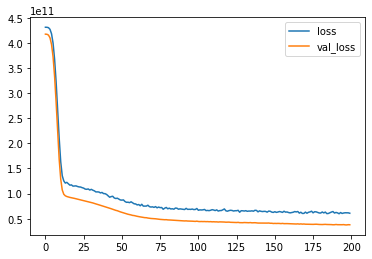

In [35]:
pd.DataFrame(model_ann.history.history).plot()

In [36]:
prediction_ann = model_ann.predict(X_test_scaled)
print('RMSE for ANN model= '+ str(np.sqrt(mean_squared_error(y_test,prediction_ann))))
print('Average Price= '+ str(np.mean(y_test)))
df_prediction['prediction_ann'] = prediction_ann

RMSE for ANN model= 194591.73162542513
Average Price= 537559.1433641976


## Comparing all three models

In [37]:
df_prediction[(df_prediction.y_test<1000000)].head()

,y_test,sqft_living,prediction_linear,prediction_ridge,prediction_lasso,prediction_ann
0,450000.0,1020.0,443141.990673,440314.812448,442878.651191,423515.43750
1,279000.0,1780.0,281593.990673,280634.607448,281363.166503,293404.40625
2,467000.0,3460.0,636733.990673,628768.082256,636440.449113,580686.31250
3,828950.0,3930.0,945645.990673,943887.129579,945385.919669,958859.75000
4,499950.0,2798.0,598965.990673,598582.820989,598731.257145,523305.71875


In [38]:
df_prediction[(df_prediction.y_test>1500000)].head()

,y_test,sqft_living,prediction_linear,prediction_ridge,prediction_lasso,prediction_ann
25,1520000.0,4500.0,1.423214e+06,1.417209e+06,1.422942e+06,1331395.50
223,2000000.0,2610.0,1.655350e+06,1.651537e+06,1.655037e+06,1581042.50
232,1570000.0,5620.0,1.674718e+06,1.668062e+06,1.674497e+06,1671986.50
255,1900000.0,3020.0,1.720542e+06,1.729255e+06,1.720257e+06,1885964.25
346,1900000.0,5080.0,1.385358e+06,1.378366e+06,1.385054e+06,1344623.00


In [39]:
sum(df_prediction['prediction_ann']<0) #no negative price prediction

0

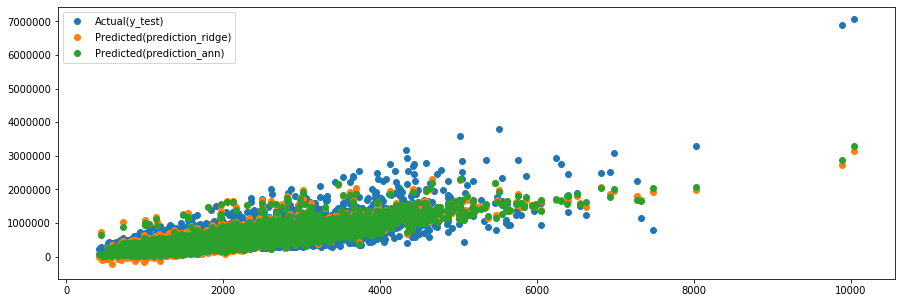

In [40]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(df_prediction['sqft_living'],df_prediction['y_test'],label='Actual(y_test)')
ax.scatter(df_prediction['sqft_living'],df_prediction['prediction_ridge'],label='Predicted(prediction_ridge)')
ax.scatter(df_prediction['sqft_living'],df_prediction['prediction_ann'],label='Predicted(prediction_ann)')
plt.legend()

In [41]:
#what ANN is predicting for prices predicted negative by other models
df_prediction[(df_prediction['prediction_ridge']<0)].head()

,y_test,sqft_living,prediction_linear,prediction_ridge,prediction_lasso,prediction_ann
679,229050.0,420.0,-13416.009327,-17666.046709,-13713.551074,91369.921875
1134,169950.0,840.0,-2226.009327,-1291.176252,-2455.569169,44197.535156
1479,100000.0,660.0,-74986.009327,-78004.109721,-75252.330794,34129.031250
1547,241000.0,1010.0,-32514.009327,-31672.069718,-32751.851535,33741.707031
1640,128750.0,880.0,-133116.009327,-132331.173106,-133340.560246,16354.949219


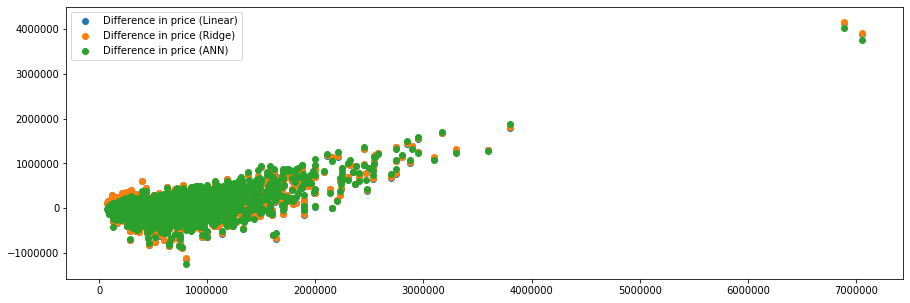

In [42]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(df_prediction['y_test'],df_prediction['y_test']-df_prediction['prediction_linear'],label='Difference in price (Linear)')
ax.scatter(df_prediction['y_test'],df_prediction['y_test']-df_prediction['prediction_ridge'],label='Difference in price (Ridge)')
ax.scatter(df_prediction['y_test'],df_prediction['y_test']-df_prediction['prediction_ann'],label='Difference in price (ANN)')
plt.legend()

## Conclusion

- ANN is not predicting any negative prices but the prices are not close to actual price for which other models are predicting negative values.
- All models are failing in predicting higher prices especially more than 1 million. Difference between actual and predicted starts becoming bigger and bigger as the price increase.
- All models are comfortable in predicting price around 500K which near to average price.
- When I remove the price more than 1 million from the dataset then I get good results. RMSE is around 20-25% of mean price.

## How to make it more accurate ?

- Remove data having prices more than 1 million from original dataset?
- Prepare another model for predicting price more than 1 million ?
- Any model parameters to change ?